In [ ]:
!pip install gdown
!pip install tensorflow
!pip install --upgrade opencv-python



In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2

because the zip is large and we are going to use colab we are downloading it straight into the colab this way for quality of life.

In [ ]:
# to download from
file_id = "1PyxqW_nsORX4PetkQo6OIL0mUL1pFsTD"
!gdown --id {file_id} -O rare_species.zip




/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1PyxqW_nsORX4PetkQo6OIL0mUL1pFsTD
From (redirected): https://drive.google.com/uc?id=1PyxqW_nsORX4PetkQo6OIL0mUL1pFsTD&confirm=t&uuid=9de1ff19-ad53-41ca-b44a-17a499b40d00
To: /content/rare_species.zip
100% 4.26G/4.26G [01:05<00:00, 64.8MB/s]


In [ ]:
# verify file size
!ls -lh rare_species.zip

-rw-r--r-- 1 root root 4.0G Mar 10 10:29 rare_species.zip


In [ ]:
# directory creation for excation
extract_path = '/content/rare_species'
if not os.path.exists(extract_path):
    os.makedirs(extract_path)
    print(f"Created directory: {extract_path}")

Created directory: /content/rare_species


In [ ]:
# extraction
print("Extracting zip ")
with zipfile.ZipFile('rare_species.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete")

Extracting zip 
Extraction complete


In [ ]:
# list fo contents for double-check
!ls -la {extract_path}



total 2932
drwxr-xr-x 204 root root   12288 Mar 17 19:19 .
drwxr-xr-x   1 root root    4096 Mar 17 19:18 ..
drwxr-xr-x   2 root root   12288 Mar 17 19:18 arthropoda_apidae
drwxr-xr-x   2 root root    4096 Mar 17 19:19 arthropoda_attelabidae
drwxr-xr-x   2 root root    4096 Mar 17 19:19 arthropoda_carabidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_cerambycidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_coenagrionidae
drwxr-xr-x   2 root root   20480 Mar 17 19:18 arthropoda_formicidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_gomphidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_lucanidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_nymphalidae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_palinuridae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_papilionidae
drwxr-xr-x   2 root root    4096 Mar 17 19:19 arthropoda_pisauridae
drwxr-xr-x   2 root root    4096 Mar 17 19:18 arthropoda_platystictidae


In [ ]:
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]
print(f"Found CSV files: {csv_files}")

if csv_files:
    metadata_path = os.path.join(extract_path, csv_files[0])
    metadata = pd.read_csv(metadata_path)
    print(f"Loaded metadata with shape: {metadata.shape}")
    print(metadata.head())
else:
    print("No CSV file found.")




Found CSV files: ['metadata.csv']
Loaded metadata with shape: (11983, 7)
                        rare_species_id  eol_content_id  eol_page_id  \
0  75fd91cb-2881-41cd-88e6-de451e8b60e2        12853737       449393   
1  28c508bc-63ff-4e60-9c8f-1934367e1528        20969394       793083   
2  00372441-588c-4af8-9665-29bee20822c0        28895411       319982   
3  29cc6040-6af2-49ee-86ec-ab7d89793828        29658536     45510188   
4  94004bff-3a33-4758-8125-bf72e6e57eab        21252576      7250886   

    kingdom    phylum            family  \
0  animalia  mollusca         unionidae   
1  animalia  chordata       geoemydidae   
2  animalia  chordata  cryptobranchidae   
3  animalia  chordata          turdidae   
4  animalia  chordata         indriidae   

                                           file_path  
0  mollusca_unionidae/12853737_449393_eol-full-si...  
1  chordata_geoemydidae/20969394_793083_eol-full-...  
2  chordata_cryptobranchidae/28895411_319982_eol-...  
3  chordata_tur

# **EDA:**

A: Class distribution analysis: checking families for overrepresenation, if present, data augmentation is a possible conclusion (for class imbalance)

B: Image Quality and Resolution check: Are all images consistent size and quality

C: Color Distribution Across Species: What are distinguishing factoes, (color, texture, shape)

D: Shape & Texture features: Are species classified by color, shape, patterns or textures? > try Sobel, Canny, or Histograms

# A

Number of unique families: 202
Top 10 most common families:
family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
plethodontidae     270
bovidae            240
bucerotidae        210
acroporidae        210
diomedeidae        180
Name: count, dtype: int64


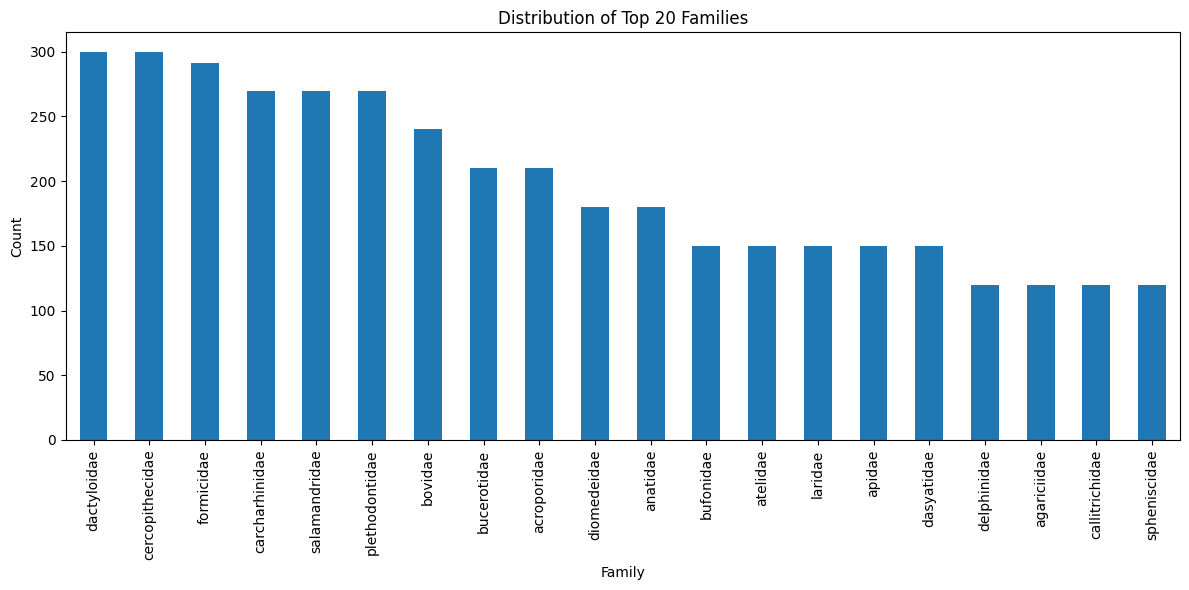

In [ ]:
# defining processed data directory and raw data_dir
DATA_DIR = '/content/rare_species'
processed_data_path = '/content/processed_data'

if not os.path.exists(processed_data_path):
    os.makedirs(processed_data_path)

# image distribution by family
if 'family' in metadata.columns:
    family_counts = metadata['family'].value_counts()
    print(f"Number of unique families: {len(family_counts)}")
    print("Top 10 most common families:")
    print(family_counts.head(10))

    # family distribution plot
    plt.figure(figsize=(12, 6))
    family_counts.head(20).plot(kind='bar')
    plt.title('Distribution of Top 20 Families')
    plt.xlabel('Family')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



# B

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Image Resolution Analysis:
Unique resolutions: 5229
Average width: 1924.6 ± 1267.5
Average height: 1512.3 ± 951.3

Format distribution:
JPEG    11983
Name: count, dtype: int64


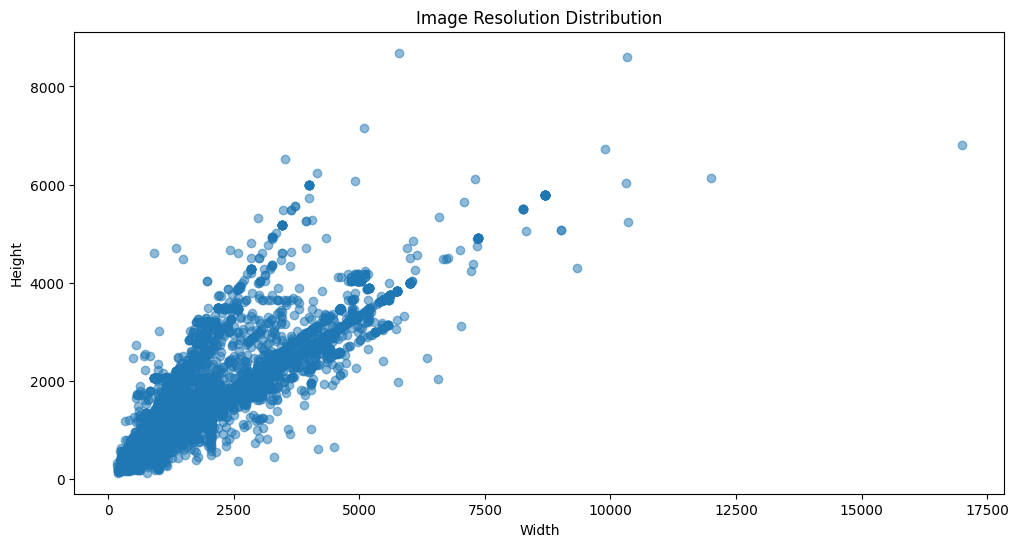

In [ ]:
if 'file_path' in metadata.columns:
    # Analyze image dimensions
    resolutions = []
    formats = []

    for idx, row in metadata.iterrows():
        img_path = os.path.join(DATA_DIR, row['file_path'])
        try:
            with Image.open(img_path) as img:
                resolutions.append(img.size)
                formats.append(img.format)
        except:
            continue

    # Calculate statistics
    unique_resolutions = pd.Series(resolutions).value_counts()
    width, height = zip(*resolutions)

    print("\nImage Resolution Analysis:")
    print(f"Unique resolutions: {len(unique_resolutions)}")
    print(f"Average width: {np.mean(width):.1f} ± {np.std(width):.1f}")
    print(f"Average height: {np.mean(height):.1f} ± {np.std(height):.1f}")
    print("\nFormat distribution:")
    print(pd.Series(formats).value_counts())

    # Visualize resolution distribution
    plt.figure(figsize=(12, 6))
    plt.scatter(width, height, alpha=0.5)
    plt.title('Image Resolution Distribution')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

# C

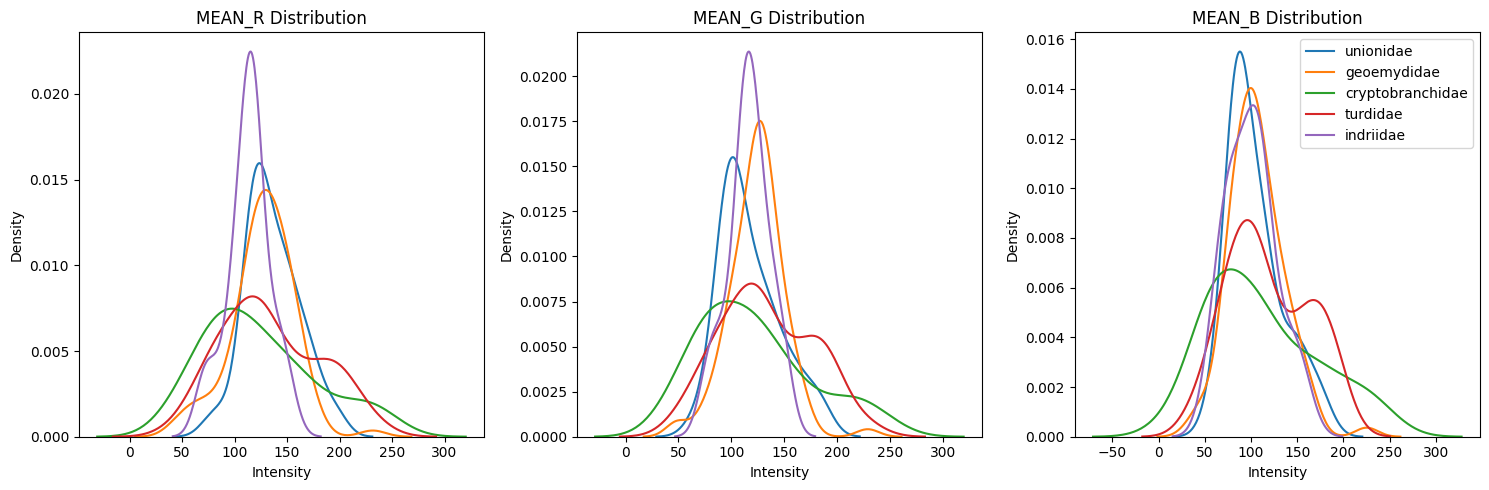

In [ ]:
import seaborn as sns
if 'family' in metadata.columns:
    # Calculate color statistics
    color_stats = []

    for idx, row in metadata.iterrows():
        img_path = os.path.join(DATA_DIR, row['file_path'])
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            color_stats.append({
                'family': row['family'],
                'mean_r': np.mean(img[:,:,0]),
                'mean_g': np.mean(img[:,:,1]),
                'mean_b': np.mean(img[:,:,2])
            })
        except:
            continue

    color_df = pd.DataFrame(color_stats)

    # color distributionp plot
    plt.figure(figsize=(15, 5))
    for i, channel in enumerate(['mean_r', 'mean_g', 'mean_b']):
        plt.subplot(1, 3, i+1)
        for family in color_df['family'].unique()[:5]:  # Top 5 families
            sns.kdeplot(color_df[color_df['family'] == family][channel], label=family)
        plt.title(f'{channel.upper()} Distribution')
        plt.xlabel('Intensity')
    plt.tight_layout()
    plt.legend()
    plt.show()

# D

In [ ]:
plt.figure(figsize=(15, 10))
for i, (idx, row) in enumerate(metadata.iterrows(), 1):  # Iterate through ALL rows
    img_path = os.path.join(DATA_DIR, row['file_path'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(len(metadata), 2, i*2-1)  # Dynamic subplot sizing
    plt.imshow(img, cmap='gray')
    plt.title(f'Original: {row["family"]}')

# edge detection

    edges = cv2.Canny(img, 100, 200)
    plt.subplot(len(metadata), 2, i*2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')

plt.tight_layout()
plt.show()

# texture analysis

texture_features = []
for idx, row in metadata.iterrows():
    img_path = os.path.join(DATA_DIR, row['file_path'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        texture_features.append({
            'family': row['family'],
            'contrast': feature.greycoprops(feature.greycomatrix(img, [1], [0]), 'contrast')[0][0],
            'entropy': shannon_entropy(img)
        })

texture_df = pd.DataFrame(texture_features)

# texture features plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='family', y='contrast', data=texture_df[texture_df['family'].isin(texture_df['family'].value_counts().index[:5])])
plt.title('Texture Contrast Distribution by Family')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

Based on the EDA a conclusion will be made to:



1.   deal with distribution image quality and color analysis
2.   test color vs grayscale
3.   identify differentation p species, color shape texture
4.   augmentation for imbalances
5.   unsupervised learning for outliers (unsupervised models dont rely on labels so can find patterns better_
6.   Resizing, when resizing compare accuracy effects, manual re-runs per resolution size to find most fitting one
7.   UMAP/Autoencoder if no social life and bored



In [ ]:
# function to preprocess 1 image
def preprocess_image(image_path, target_size=(224, 224)):
    try:
        img = Image.open(image_path)
        img = img.convert('RGB')  # Convert to RGB in case of RGBA or grayscale
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0,1]
        return img_array, True
    except Exception as e:
        try:
            img = cv2.imread(image_path)
            if img is None:
                return None, False
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, target_size)
            img_array = img.astype(np.float32) / 255.0
            return img_array, True
        except Exception as e2:
            print(f"Failed to process {image_path}: {e2}")
            return None, False

In [ ]:
# function to create train/val/test splits
def create_data_splits(metadata, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, stratify_col='family'):
    from sklearn.model_selection import train_test_split


    train_data, temp_data = train_test_split(
        metadata,
        train_size=train_ratio,
        random_state=42,
        stratify=metadata[stratify_col] if stratify_col in metadata.columns else None
    )

    val_ratio_adjusted = val_ratio / (val_ratio + test_ratio)
    val_data, test_data = train_test_split(
        temp_data,
        train_size=val_ratio_adjusted,
        random_state=42,
        stratify=temp_data[stratify_col] if stratify_col in metadata.columns else None
    )

    print(f"Data splits created - Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")
    return train_data, val_data, test_data

In [ ]:
# data splits
if 'family' in metadata.columns:
    train_data, val_data, test_data = create_data_splits(metadata)

    # savings splits for baseline score
    train_data.to_csv(f'{processed_data_path}/train_metadata.csv', index=False)
    val_data.to_csv(f'{processed_data_path}/val_metadata.csv', index=False)
    test_data.to_csv(f'{processed_data_path}/test_metadata.csv', index=False)

In [ ]:
# process a small batch to test the pipeline and understand image characteristics
def process_sample_batch(metadata_sample, base_path):
    sample_images = []
    failed_images = []

    for idx, row in tqdm(metadata_sample.iterrows(), total=len(metadata_sample)):
        if 'file_path' in row:
            image_path = os.path.join(base_path, row['file_path'])
        else:
            image_path = os.path.join(base_path, f"{row['family']}/{row['species']}.jpg")

        img_array, success = preprocess_image(image_path)
        if success:
            sample_images.append(img_array)
        else:
            failed_images.append(image_path)

    print(f"Processed {len(sample_images)} images successfully, {len(failed_images)} failed")
    return sample_images, failed_images

# sample a small batch to test
sample_size = 10
metadata_sample = metadata.sample(sample_size)
sample_images, failed_images = process_sample_batch(metadata_sample, extract_path)

In [ ]:
# visualizing images
if sample_images:
    plt.figure(figsize=(15, 5))
    for i in range(min(5, len(sample_images))):
        plt.subplot(1, 5, i+1)
        plt.imshow(sample_images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
